
# 项目：tmdb-movies数据分析

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a> 

## 简介

>随着社会的多元化，越来越多的影视作品走入人们的生活中。但是近年来鲜有几部新制作的电影能俘获观众的心，到底是观众越来越挑剔，还是电影作品本身不够吸引力？如果你是有一个电影公司，你想制作一部电影作品，你有想过拍一部什么样的电影吗？你会选择一名什么样的导演呢？下面的数据会给你解答疑问。

> 本报告步骤分为:

>1、提出问题

>2、查看数据

>3、清洗数据

>4、分析数据

>5、总结


<a id='wrangling'></a>

## 数据整理

### 1、提出问题：

>（1）Top5评分最高的电影是哪些？

>（2）Top5的风格电影是哪些？

>（3）导演和收入的关系是什么样的？

>（4）票房和打分的关系是什么样的？

>（5）哪种风格的电影现在更流行？

### 2、查看数据：

导入原始csv文件

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("tmdb-movies.csv")

查看csv数据表基本信息（维度、列名称、数据格式、所占空间等），是否有重复

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df[df.index.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [5]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### 选择用于分析的列

In [6]:
df.columns.to_frame().reset_index()

,index,0
0,id,id
1,imdb_id,imdb_id
2,popularity,popularity
3,budget,budget
4,revenue,revenue
5,original_title,original_title
6,cast,cast
7,homepage,homepage
8,director,director
9,tagline,tagline


In [7]:
wanted_columns = [5, 8, 13, 16, 17, 18, 19, 20]
df_shorted = df.iloc[:, wanted_columns]

In [8]:
display(df_shorted.shape)
df_shorted.head()

(10866, 8)

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
import time

start_time = time.time()

df_shorted.isnull().any()

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))


start_time = time.time()

df.isnull().any()

end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 0.0034821 seconds
Elapsed time was 0.00860691 seconds


In [10]:
df_shorted.to_csv('shorted.csv', index = False)

### 3、清洗数据

In [11]:
df = pd.read_csv('shorted.csv')

In [12]:
df.isnull().any()

original_title    False
director           True
genres             True
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [13]:
df[pd.isnull(df).any(axis=1)]

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,Belli di papÃ,Guido Chiesa,NaN,21,6.1,2015,0.000000e+00,0.000000e+00
532,Iliza Shlesinger: Freezing Hot,NaN,Comedy,14,6.6,2015,0.000000e+00,0.000000e+00
548,Sense8: Creating the World,NaN,Documentary|Science Fiction,12,7.5,2015,0.000000e+00,0.000000e+00
556,With This Ring,NaN,Comedy|Romance,14,6.5,2015,0.000000e+00,0.000000e+00
620,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,13,5.0,2015,0.000000e+00,0.000000e+00
997,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,NaN,13,6.8,2014,0.000000e+00,0.000000e+00
1032,Marvel Studios: Assembling a Universe,NaN,TV Movie|Documentary,32,6.3,2014,0.000000e+00,0.000000e+00
1054,Unlocking Sherlock,NaN,TV Movie|Documentary,11,7.2,2014,0.000000e+00,0.000000e+00
1203,Free to Play,NaN,Documentary,40,7.0,2014,1.381637e+05,0.000000e+00
1241,Dance-Off,NaN,Romance|Music|Comedy,18,5.7,2014,0.000000e+00,0.000000e+00


In [14]:
df = df.dropna(how='any')

In [15]:
display(df.shape)
df.isnull().any()

(10801, 8)

original_title    False
director          False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [16]:
df.duplicated().any().sum()

1

In [17]:
df[df.duplicated()]

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,TEKKEN,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().any()

False

In [20]:
df.to_csv('cleaned.csv', index=False)

导入清洗过的数据

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
% matplotlib inline 

df = pd.read_csv('cleaned.csv')
display(df.shape)
df.head()

(10800, 8)

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## 探索性数据分析：

### 4、分析问题：

#### 研究问题1：Top5评分最高的电影是哪些？

In [22]:
df_top_rated = df.sort_values(by=['vote_average'], ascending=False)
df_top_rated.head()

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3858,The Story of Film: An Odyssey,Mark Cousins,Documentary,14,9.2,2011,0.0,0.0
536,The Mask You Live In,Jennifer Siebel Newsom,Documentary,11,8.9,2015,0.0,0.0
1192,Black Mirror: White Christmas,Carl Tibbetts,Drama|Horror|Mystery|Science Fiction|Thriller,41,8.8,2014,0.0,0.0
2251,Life Cycles,Derek Frankowski,Documentary,27,8.8,2010,0.0,0.0
6857,Pink Floyd: Pulse,David Mallet,Music,23,8.7,2006,0.0,0.0


注意：投票数较少，需要再进一步查看选票计数的分布情况。

In [23]:
df.vote_count.describe()

count    10800.000000
mean       218.600741
std        577.165055
min         10.000000
25%         17.000000
50%         39.000000
75%        147.000000
max       9767.000000
Name: vote_count, dtype: float64

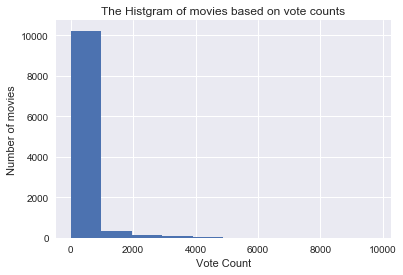

In [24]:
plt.hist(df.vote_count)
plt.title('The Histgram of movies based on vote counts')
plt.ylabel('Number of movies')
plt.xlabel('Vote Count');

In [25]:
criteria = ['vote_count <=17', 'vote_count > 17 and vote_count<=38', 'vote_count >38 and vote_count<=146', 'vote_count>146']
def top_5_movies(df):
    quartiles = ['First', 'Second', 'Third', 'Fourth']
    data = []
    for c in criteria:
        group = df.query(c).sort_values(by=['vote_average'], ascending=False).head().reset_index().iloc[:, [1, 4, 5]]
        group.index=range(1,6)
        group.columns=['Title', 'Count', 'Rating']
        data.append(group)
    df_combined = pd.concat(
        [df.rename(columns=lambda x: x.zfill(4)) for df in data], keys=['Top 5 Movies in {} Quartiles'.format(a) for a in quartiles], axis =0)
    display(df_combined)   
top_5_movies(df)

Title  \
Top 5 Movies in First Quartiles  1                      The Story of Film: An Odyssey   
                                 2                               The Mask You Live In   
                                 3                Dave Chappelle: Killin' Them Softly   
                                 4  A Personal Journey with Martin Scorsese Throug...   
                                 5                              Queen - Rock Montreal   
Top 5 Movies in Second Quartiles 1                                        Life Cycles   
                                 2                                  Pink Floyd: Pulse   
                                 3                                            Tropico   
                                 4                                  Stop Making Sense   
                                 5                            Iron Maiden: Flight 666   
Top 5 Movies in Third Quartiles  1                      Black Mirror: White Christmas   
                                 2                                  The Art of Flight   
                                 3      The Jinx: The Life and Deaths of Robert Durst   
                                 4   Dear Zachary: A Letter to a Son About His Father   
                                 5                                  World of Tomorrow   
Top 5 Movies in Fourth Quartiles 1                           The Shawshank Redemption   
                                 2                                      The Godfather   
                                 3                                           Whiplash   
                                 4                                       Forrest Gump   
                                 5                                    The Dark Knight   

                                    Count  Rating  
Top 5 Movies in First Quartiles  1     14     9.2  
                                 2     11     8.9  
                                 3     17     8.5  
                                 4     11     8.5  
                                 5     14     8.5  
Top 5 Movies in Second Quartiles 1     27     8.8  
                                 2     23     8.7  
                                 3     24     8.4  
                                 4     23     8.4  
                                 5     28     8.3  
Top 5 Movies in Third Quartiles  1     41     8.8  
                                 2     60     8.5  
                                 3     72     8.4  
                                 4     74     8.3  
                                 5     47     8.2  
Top 5 Movies in Fourth Quartiles 1   5754     8.4  
                                 2   3970     8.3  
                                 3   2372     8.2  
                                 4   4856     8.1  
                                 5   8432     8.1

#### 研究问题2：Top5的风格电影

In [26]:
df_genres = df.genres.value_counts().to_frame().head(5)
df_genres

,genres
Drama,711
Comedy,707
Documentary,306
Drama|Romance,289
Comedy|Drama,280


In [27]:
df_genres = df.genres.value_counts().to_frame().head(5)
df_genres

,genres
Drama,711
Comedy,707
Documentary,306
Drama|Romance,289
Comedy|Drama,280


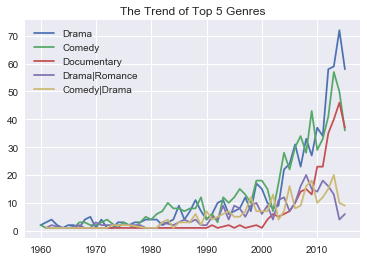

In [28]:
def trend(df):
    data = []
    for genre in df_genres.index.tolist():
        #display(genre)
        df1 = df[df.genres==genre].groupby(['release_year']).count()[['genres']]
        data.append((df1, genre))
    #return data
    f, ax = plt.subplots()
    for n in data:
        plt.plot(n[0], label=n[1])
    plt.legend()
    plt.title("The Trend of Top 5 Genres")

trend(df)

根据这些图表，戏剧、喜剧、纪录片、恐怖片的数量剧增。

戏剧和浪漫电影的数量在2010后急剧下降。需要更多的数据来查询下降原因。

#### 研究问题3：导演和收入的关系是什么样的？

In [29]:
top_5 = df.director.value_counts().head(5).index.tolist()
top_5

['Woody Allen',
 'Clint Eastwood',
 'Steven Spielberg',
 'Martin Scorsese',
 'Ridley Scott']

In [30]:
df_director = df[df.director.isin(top_5)]
df_director.head()

,original_title,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
7,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
33,Bridge of Spies,Steven Spielberg,Thriller|Drama,1638,7.1,2015,3.679998e+07,1.496016e+08
155,Irrational Man,Woody Allen,Mystery|Drama,319,6.1,2015,1.012000e+07,2.519979e+07
568,The Audition,Martin Scorsese,Comedy,10,6.1,2015,0.000000e+00,0.000000e+00
652,American Sniper,Clint Eastwood,War|Action,3004,7.5,2014,5.416015e+07,4.995145e+08


In [31]:
avg_rev = df_director.groupby(['director']).revenue_adj.mean().to_frame().sort_values(by=['revenue_adj'], ascending=False).reset_index()
avg_rev.index = range(1,6)
avg_rev

,director,revenue_adj
1,Steven Spielberg,5.242223e+08
2,Ridley Scott,1.834594e+08
3,Clint Eastwood,1.076379e+08
4,Martin Scorsese,8.367386e+07
5,Woody Allen,2.876045e+07


In [32]:
avg_rating = df_director.groupby(['director']).vote_average.mean().to_frame().sort_values(by=['vote_average'], ascending=False).reset_index()
avg_rating.index = range(1,6)
avg_rating

,director,vote_average
1,Martin Scorsese,6.958621
2,Steven Spielberg,6.824138
3,Clint Eastwood,6.508824
4,Ridley Scott,6.478261
5,Woody Allen,6.444444


In [33]:
result = pd.merge(avg_rev, avg_rating, on='director')
result

,director,revenue_adj,vote_average
0,Steven Spielberg,5.242223e+08,6.824138
1,Ridley Scott,1.834594e+08,6.478261
2,Clint Eastwood,1.076379e+08,6.508824
3,Martin Scorsese,8.367386e+07,6.958621
4,Woody Allen,2.876045e+07,6.444444


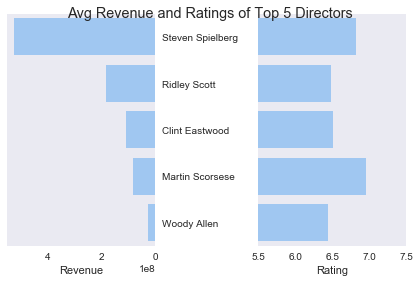

In [34]:
sns.set(style='dark')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Avg Revenue and Ratings of Top 5 Directors')

#f.subplotParams(wspace=0.4)
#plot the revenue
sns.set_color_codes("pastel")
sns.barplot(x='revenue_adj', y='director', data = result, label="Average Revenue", color="b", ax = ax1)

#plot the rating
sns.set_color_codes('pastel')
sns.barplot(x='vote_average', y='director', data = result, label='Average Rating', color='b', ax = ax2)

#add a legend and information axis label
ax1.set(ylabel='', xlabel='Revenue');
ax2.set(xlim=(5.5,7.5), ylabel='', xlabel='Rating')
ax1.yaxis.tick_right()
ax1.invert_xaxis()

f.tight_layout()

导演的名声对票房的影响并不是那么绝对，名气高的导演也会有低收入票房的情况出现，可能和导演拍的片子类型、定价、投放市场的时间都有一定关系，需要进一步查看数据。

#### 研究问题4：票房和打分的关系是什么样的？

(2717, 8)


Text(0.5,1,'Relationship Between Revenue and Ratings')

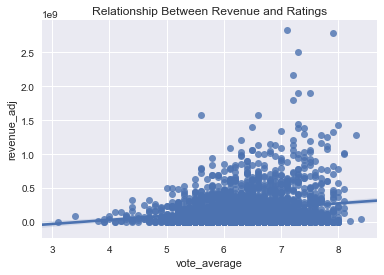

In [35]:
import seaborn as sns 
sns.set(color_codes=True)
df1 = df.query('vote_count >= 146')
print(df1.shape)
sns.regplot(y='revenue_adj', x='vote_average', data=df1)
plt.title('Relationship Between Revenue and Ratings')

目前看不太出来票房和打分之间的关系。

#### 研究问题5：哪种风格的电影现在更流行？

In [36]:
list_geners = df.genres.apply(lambda x: x.split("|")).tolist()
genres = set(x for l in list_geners for x in l)
genres = list(genres)
genres

['Crime',
 'Adventure',
 'Action',
 'Drama',
 'Comedy',
 'Romance',
 'History',
 'Documentary',
 'Western',
 'Family',
 'Science Fiction',
 'Foreign',
 'Music',
 'Thriller',
 'Horror',
 'Animation',
 'TV Movie',
 'Mystery',
 'War',
 'Fantasy']

In [37]:
def genre_count(df):
    for genre in genres:
        df[genre] =(df.genres.str.contains(genre)).map({False: 0, True: 1})

In [38]:
def table(df):
    appended_data = []
    for year in range(2005,2015):
        df1 = df.query('release_year =={}'.format(year)).copy()
        genre_count(df1)
        #display(df1.head(1))
        df2 = df1.iloc[:, 8:].astype(int)
        count = df2.sum().to_frame().T
        count.index =[year]
       #display(df2.head(1))
        total = count.sum(axis=1).tolist()[0]
        count = count/total
        #display(count.head())
        appended_data.append(count)
        #display(appended_data) 
    df3 = pd.concat(appended_data)
    #display(df_genres)
    return df3


In [39]:
df3 = table(df)
df4 = df3[df3>0.05].dropna(axis=1)
df4

,Action,Drama,Comedy,Thriller,Horror
2005,0.074866,0.194652,0.152941,0.098396,0.059893
2006,0.076628,0.188697,0.148467,0.109195,0.053640
2007,0.084305,0.176682,0.135426,0.110314,0.069955
2008,0.079805,0.188925,0.135179,0.103420,0.061889
2009,0.079941,0.164323,0.146558,0.116210,0.066617
2010,0.088852,0.174350,0.140821,0.111484,0.065381
2011,0.090055,0.167580,0.134691,0.114330,0.061081
2012,0.077953,0.182677,0.137795,0.125984,0.081890
2013,0.086735,0.184402,0.126093,0.127551,0.074344
2014,0.088296,0.194387,0.125941,0.122519,0.071869


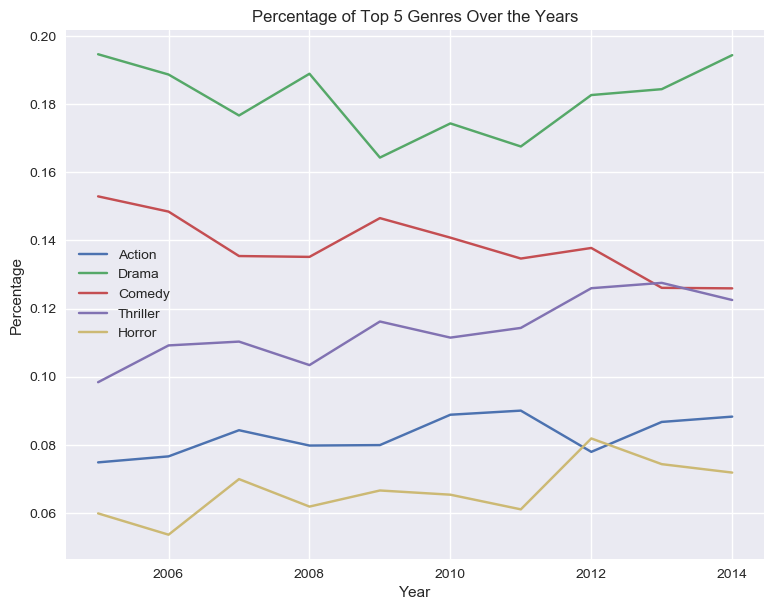

In [40]:
fig = plt.figure(figsize=(9,7), dpi=100)
ax = plt.subplot(111)
ax.plot(df4)
plt.title("Percentage of Top 5 Genres Over the Years")
plt.xlabel('Year')
plt.ylabel('Percentage')
#the original code works on my notebook
ax.legend(labels=df4.columns)
plt.show()


2006-2014年，客户喜欢的电影类型基本没有太大波动。整体排名依次是：drama，comedy，thriller，action，horror。

值得注意的是：
 
2012年horror上升为排名第四，action排名为第五。

2013年thriller排名上升为第二。


 <a id='conclusions'></a>
 ## 结论

### 局限性：目前数据来自于消费过电影的人，样本非全部人口，会存在片面性。